# Quantum Support vector machine

Quantum Support Vector Machine (QSVM) is a quantum version of the Support Vector Machine algorithm which uses quantum laws to perform calculations. QSVM uses the power of Quantum technology and quantum software to improve the performance of classical SVM algorithms that run on classical machines with CPUs or GPUs.

## Why we need QSVM?

Support vector machine works perfectly fine for our classical systems, but when greater number of features are involved, classical SVM fails. There we get the need of QSVM. It has been proven that QSVM can achieve **O[log(NM)]** performance on both
training and testing processes, and thus, it can exponentially speed up a calculation when compared to the classical SVM algorithm.

_Here N is the number of dimensions of the data, M is the number of training data._

## How QSVM Works

The implementation consists of three basic steps: 

 - Preprocessing that consists of Scaling, normalization and principal component analysis
 - Generation of kernel matrix  
 - Estimation of the kernel for new set of data points (test data) for QSVM classification. 

In the QSVM classification phase, classical SVM is used to generate the separating hyperplane rather than using a quantum circuit and here the quantum computer is used twice. First, the kernel is estimated for all pairs of training data, and the second time the kernel is estimated for a new datum (test data). Least-squares reformulation of the support vector machine is used to change the quadratic programming problem of SVM, into a problem of solving a linear equation system:

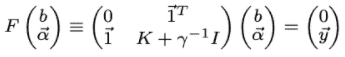

Where,

K is  m×m kernel matrix and its elements can be calculated by

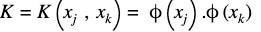

Y is a user-defined value to control the trade-off between training error and SVM objective,  y is a vector storing the labels of the training data, I is the unit matrix, So the only unknown parameter in the equation is a vector.

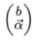

In here, both α and b are parameters for calculating the SVM classifier, the decision hyperplane for splitting data into two sub-groups

After calculating the Kernel matrix on the quantum computer, we can train the Quantum SVM the same way as a classical SVM. Once the parameters of the hyperplane are determined, a new data point x can be classified as

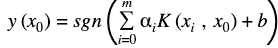

Where, 

vector  x with i = 1,…,m is the training data,

αi  is the ith dimension of the parameter vector α

b is the offset of the hyperplane, which in our case is choosen to be zero

and the sign function _sgn()_ is defined as

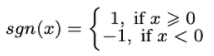

### Kernel Quantum SVM method

**Kernel Trick for Classical SVM:** mapping the non-linear separable data into a higher dimensional feature space using a kernel function that measures the similarity between two data points; then using the kernel to find a separating hyperplane.

**Quantum Kernel Estimation (introduced by IBM, published in Nature 567
(2019) 209):** mapping classical data 𝑥⃗ non-linearly to a quantum state using Quantum Feature Map function; calculating the kernel matrix 𝐾(𝑥⃗, 𝑧⃗)=|⟨Φ(𝑥⃗)|Φ(𝑧⃗)⟩|² using a quantum computer; then training the quantum SVM in the same way as a classical SVM.

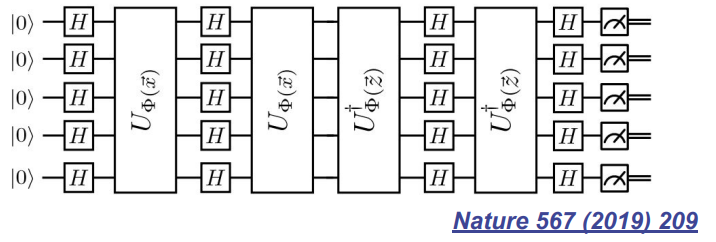

### Defining parameters used in QSVM

Few important parameters that are specific to the quantum algorithms are:
 - *feature_dimension:* number of features, 
 - *depth:* the number of repeated circuits, 
 - *entangler_map:* describe the connectivity of qubits [source, target], 
 - *entanglement:* generate the qubit connectivity {‘full’- entangles each qubit with all the subsequent ones and ‘linear’ -entangles each qubit with the next}
 - *feature_map(FeatureMap):* feature map module to transform the data to feature space,
 - *Datapoints:* prediction dataset,
 - *quantum_instance (QuantumInstance):* quantum backend with all execution settings,
 - *shots:* number of repetitions of each circuit,
 - *seed_simulator:* random seed for simulators,
 - *seed_transpiler:* the random seed for circuit mapper
 - *QSVM:* Quantum SVM method that will run the classification algorithm (binary or multiclass)

### Adding Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
#from qiskit.utils import QuantumInstance
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM, VQC
import qiskit

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging

### Working on ad_hoc_data set and ploting its data points

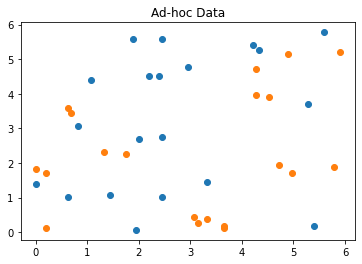

{'A': 0, 'B': 1}


In [4]:
feature_dim=2 # we support feature_dim 2 or 3
sample_Total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20, 
    test_size=10, 
    n=feature_dim, 
    gap=0.3, 
    plot_data=True
)
extra_test_data = sample_ad_hoc_data(sample_Total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_label)

### Set variables for QSVM

In [6]:
seed = 1024

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map,training_input, test_input, datapoints[0])


backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

print("Length of feature_map: ",len(feature_map))
print("Length of training_input: ",len(training_input))
print("Length of test_input: ",len(test_input))

Length of feature_map:  1
Length of training_input:  2
Length of test_input:  2


### Run QSVM

In [20]:
result = qsvm.run(quantum_instance)

In [21]:
print(result)

{'kernel_matrix_training': array([[1.0000889 , 0.00984912, 0.26363231, ..., 0.45221462, 0.17885996,
        0.3678841 ],
       [0.00984912, 1.00012708, 0.51465622, ..., 0.08388276, 0.36347272,
        0.16991873],
       [0.26363231, 0.51465622, 1.00014252, ..., 0.09062703, 0.40816123,
        0.60693306],
       ...,
       [0.45221462, 0.08388276, 0.09062703, ..., 1.00078758, 0.33082753,
        0.34146594],
       [0.17885996, 0.36347272, 0.40816123, ..., 0.33082753, 1.00058906,
        0.23138765],
       [0.3678841 , 0.16991873, 0.60693306, ..., 0.34146594, 0.23138765,
        1.00268223]]), 'svm': {'alphas': array([0.39309995, 1.20994457, 0.75165113, 2.42706867, 1.49856426,
       0.74946316, 1.85253083, 0.73391098, 1.286477  , 2.13584125,
       1.50292726, 0.63321014, 0.07849202, 0.41713279, 2.10182131,
       2.31542951, 1.71785629]), 'bias': array([0.00716096]), 'support_vectors': array([[5.40353936, 0.18849556],
       [4.20973416, 5.40353936],
       [2.38761042, 4.5238934

In [23]:
print('Predicted Labels: ',result['predicted_labels'])
print('Predicted classes: ',result['predicted_classes'])


Predicted Labels:  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Predicted classes:  ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


In [24]:
print("testing success ratio: {}".format(result['testing_accuracy']))
print("preduction of datapoints:")
print("ground truth: {}".format(map_label_to_class_name(datapoints[1], qsvm.label_to_class)))
print("prediction:   {}".format(result['predicted_classes']))

testing success ratio: 1.0
preduction of datapoints:
ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
prediction:   ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


### Working on Breast Cancer data

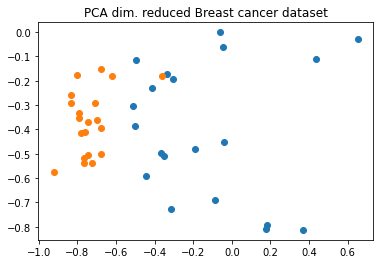

In [26]:
sample_Total, training_input, test_input, class_labels = breast_cancer(
    training_size=20,
    test_size=10,
    n=2,
    plot_data=True
)

In [27]:
seed = 1024

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map,training_input, test_input, datapoints[0])


backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

print("Length of feature_map: ",len(feature_map))
print("Length of training_input: ",len(training_input))
print("Length of test_input: ",len(test_input))

Length of feature_map:  1
Length of training_input:  2
Length of test_input:  2


In [28]:
result = qsvm.run(quantum_instance)

In [31]:
print('Predicted Labels: ',result['predicted_labels'])
print('Predicted classes: ',result['predicted_classes'])


Predicted Labels:  [0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0]
Predicted classes:  ['A', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A']


In [29]:
print("testing success ratio: {}".format(result['testing_accuracy']))
print("preduction of datapoints:")
print("ground truth: {}".format(map_label_to_class_name(datapoints[1], qsvm.label_to_class)))
print("prediction:   {}".format(result['predicted_classes']))

testing success ratio: 0.8
preduction of datapoints:
ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
prediction:   ['A', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A']


## Applications of QSVM

The aim of using SVM is to correctly classify unseen data. SVMs have a number of applications in several fields.
Some common applications of SVM are-

 - **Face detection** – SVMc classify parts of the image as a face and non-face and create a square boundary around the face.
 - **Text and hypertext categorization** – SVMs allow Text and hypertext categorization for both inductive and transductive models. They use training data to classify documents into different categories. It categorizes on the basis of the score generated and then compares with the threshold value.
 - **Classification of images** – Use of SVMs provides better search accuracy for image classification. It provides better accuracy in comparison to the traditional query-based searching techniques.
 - **Bioinformatics** – It includes protein classification and cancer classification. We use SVM for identifying the classification of genes, patients on the basis of genes and other biological problems.
 - **Protein fold and remote homology detection** – Apply SVM algorithms for protein remote homology detection.
 - **Handwriting recognition** – We use SVMs to recognize handwritten characters used widely.
 - **Generalized predictive control(GPC)** – Use SVM based GPC to control chaotic dynamics with useful parameters.

## Conclusion
The SVMs can not only make the reliable prediction but also can reduce redundant information. The SVMs also obtained results comparable with those obtained by other approaches.

### References
 - https://arxiv.org/pdf/1909.11988.pdf
 - https://data-flair.training/blogs/svm-kernel-functions/
 - https://data-flair.training/blogs/svm-support-vector-machine-tutorial/
 - https://data-flair.training/blogs/applications-of-svm/
 - https://qiskit.org/documentation/stable/0.25/tutorials/machine_learning/01_qsvm_classification.html
 - https://indico.cern.ch/event/868940/contributions/3814309/attachments/2080749/3495472/QMLHEP_ICHEP2020.pdf